## Introduction:

This is the first of a series of notebooks whose goal is to interactively show you some techniques to visualize and analyze behavioral and neural data.

We assume some familiarity with Python, but we try to have a progressive complexity so that you can learn as you go.  If you're already familiar with certain things then you can move faster to more complicated parts.

Jupyter notebooks are composed of cells that can contain text (such as the one you're reading) or code that can be modified and executed interactively.  In order to run a cell you can press `Ctrl + Enter` or `Shift + Enter` if you also want to move to the successive cell. 

Some parts of the notebook are left empty and you'll have to code them for yourself, they will be highlighted with a keyboard symbol ⌨️.  In case you're really stuck, know that the full notebook is also available in the same Github repository.  But please try your best before looking at the corrections, the goal is not to reproduce the correction but to learn how to analyze data by yourself, there isn't just one right way to do it!

In this notebook we'll learn how to work with data and how to visualize it, we'll familiarize with the datasets that will be used in the following days for more advanced analysis.

## Importing the data:

We're running our notebook on Colab, which means that our code is running on Google's cloud servers.  Because of this we need to download the data we want to work on in our workspace.

With the following cell we can download some files containing helpful functions from Github:

In [1]:
#!mkdir /content/Helper_Functions/
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/accessing_data.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/hmm_plotters.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/OrthoViewer.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/plotting_functions.py

While the following cell downloads a dataset from Drive:

In [2]:
#!gdown 1KqhXO6lepzwkH7A4Ii02UK1E9okW0mbl

We have just downloaded the file `fish1_different_speeds.hdf5` to the folder `\content`.  HDF5 is a format for storing hierarchically data and corrsponding metadata. In order to access it we can use the library `h5py`.  Try to import it and open the file.  If you need some information about the library you can have a look at https://docs.h5py.org/en/stable/quick.html#core-concepts

In [3]:
#⌨️⬇️
import h5py
file=h5py.File('content/fish1_different_speeds.hdf5','r')

Now that we opened the file we can visualize what's inside thanks to the function `h5tree_view`:

In [4]:
from Helper_Functions.accessing_data import h5tree_view

You can run `h5tree_view?` to get the documentation for this function and understand what it does and what are its inputs:

In [5]:
#⌨️⬇️
h5tree_view?

Signature: h5tree_view(file)
Docstring:
Display HDF5 file structure in tree-like format.

Parameters
----------
    :file: h5py.File , opened HDF5 file.
File:      ~/Science/IBIO-Banyuls2023-Python/Helper_Functions/accessing_data.py
Type:      function


In [6]:
#⌨️⬇️
h5tree_view(file)

. content/fish1_different_speeds.hdf5
├── 📁brain
│   ├── 🔢coordinates ⚙️(3, 30971)float64
│   ├── 🔢dff ⚙️(30971, 481)float64
│   ├── 🔢times ⚙️(481,)float64
├── 📁stimulus
│   ├── 🔢T ⚙️(481,)float64
│   ├── 🔢direction ⚙️(14362,)float64
│   ├── 🔢speed ⚙️(14362,)float64
│   ├── 🔢times ⚙️(14362,)float64
├── 📁tail
│   ├── 🔢coordinates ⚙️(36107, 11, 2)float64
│   ├── 🔢deflection ⚙️(36107,)float64
│   ├── 🔢forward_thrust ⚙️(36107,)float64
│   ├── 🔢side_thrust ⚙️(36107,)float64
│   ├── 🔢times ⚙️(36107,)float64


As you can see this file contains various arrays (collection of values), organized in different groups.

## Whole-brain imaging:

Now it's probably a good time to explain the experiment from which this data was recorded.

We measured the activity of most neurons in a the brain of a fish larva using a tecnhique called light-sheet microscopy
The fish was genetically modified so that its neurons expessed a calcium sensor, a molecule whose fluorescence is enhanced when it binds calcium ions.
Then we can measure the fluorescence of each neuron as an indicator of its activity: it's a measure of its concentration of calcium ions, which in turn is correlated with its firing rate.

In order to use this technique the fish is immobilized with an agarose gel, but in this particular case the tail is free and we recorded its movements as well.  Moreover, a screen was placed below the fish to display some visual stimuli.  This is a schematic of the experimental setup:

![setup](https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/img/experimental_setup_danionella.png)

From the experiment we get images of sections of the brain at different heights. After preprocessing them we can extract the positions of the neurons and their fluorescence as a function of time.  The fluorescence signals are then rescaled so that they can be compared across different neurons (even though they might have different experrion levels of the calcium sensor).  Some people try to extract a baseline fluorescence, here we just substracted the average fluorescence and rescaled by it to get the relative change in fluorescence:

$$\Delta F/F = \frac{F(t) - \bar{F}}{\bar{F}}$$

Now let's access the array containing the rescaled fluorescence traces for all neurons and save it to a local variable named `dff`:

In [7]:
#⌨️⬇️
dff=file['brain/dff'][:]

You can see the shape of the array as `dff.shape`:

In [8]:
#⌨️⬇️
dff.shape

(30971, 481)

It is a two dimensional array containing the $\Delta F/F$ values for 30971 neurons at 481 different timepoints.
You can access the value of neuron i at timepoint j with `dff[i,j]` (remember that in Python indices start from 0):

In [107]:
#⌨️⬇️
dff[27,0]

-0.07617984224970385

Now that's not very informative...  What would be nicer would be to plot the fluorescence values of a neuron over time.

## Plotting:

We can do that using a library called matplotlib:

In [108]:
import matplotlib.pyplot as plt

We also need the times at which the fluorescence was measured:

In [109]:
#⌨️⬇️
brain_times=file['brain/times'][:]

Now we have everything to do our plot, if you need some help have a look at https://matplotlib.org/stable/tutorials/introductory/pyplot.html#introduction-to-pyplot:

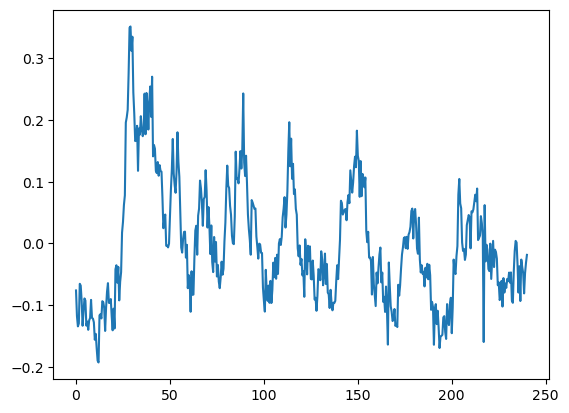

In [110]:
#⌨️⬇️
i=27
plt.plot(brain_times,dff[i])
plt.show()

In order to access all fluorescence values for neuron i we can write `dff[i]`, whereas to access the fluorescence value of all neurons at timepoint j we have to write `dff[:,j]`

You can also make the plot nicer by setting the range and adding labels:

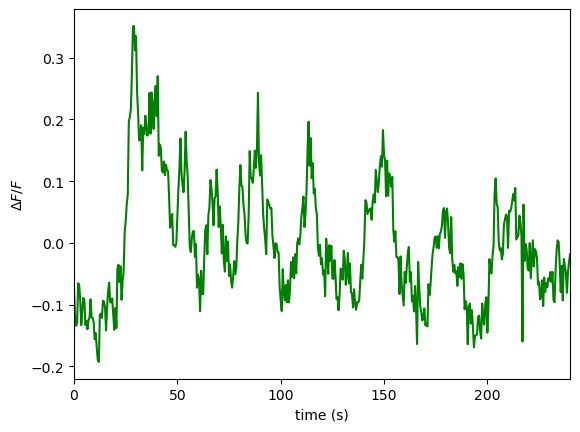

In [111]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(brain_times,dff[i],'green')
ax.set_xlabel('time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_xlim(0,brain_times[-1])
plt.show()

Note that we can use negative indices to access the elements counting from the end. `brain_times[-1]` is the last timepoint in the array.

You can run the following cell to install ipympl and make the plots interactive with the command `%matplotlib widget`:

In [96]:
#!pip install ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

In [97]:
%matplotlib widget

Try plotting the fluorescence trace once again, now you can zoom in and move around by selecting the buttons on the top left:

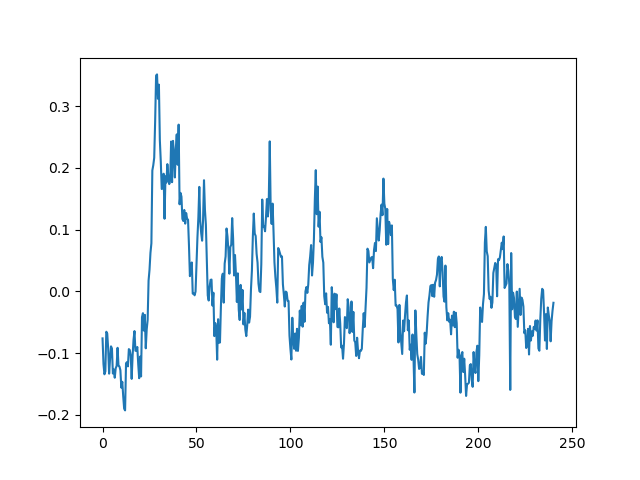

In [98]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(brain_times,dff[i])
plt.show()

To go back to the noninteractive mode you can run `%matplotlib inline`:

In [99]:
%matplotlib inline

Now try plotting the activity of the first 100 neurons by using a `for` loop:

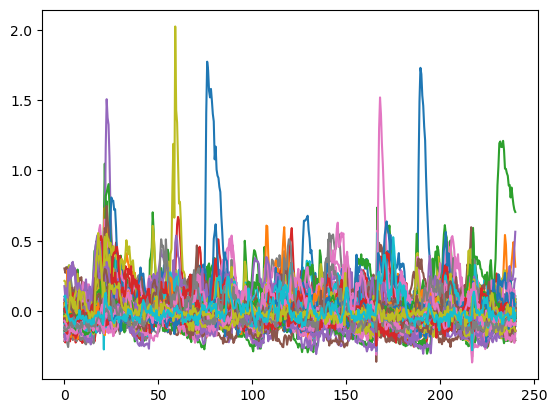

In [100]:
#⌨️⬇️
fig,ax=plt.subplots()
for i in range(100):
    ax.plot(brain_times,dff[i])
plt.show()

Things get crowded pretty quickly!

We can have a look at some summary statistics of the neural activity, for example the average activity across all neurons and its dispersion for each timepoints.  To do so it will be useful to use the library numpy, which allows for fast array operation.

In [101]:
import numpy as np #let's make it shorter as we're going to use it quite often

You should have a look at the functions `np.mean` and `np.std`:

In [102]:
#⌨️⬇️
dff_mean=np.mean(dff,axis=0)
dff_std=np.std(dff,axis=0)

Now you can use the function `plt.fill_between` to color the region closer than one standard deviation to the mean:

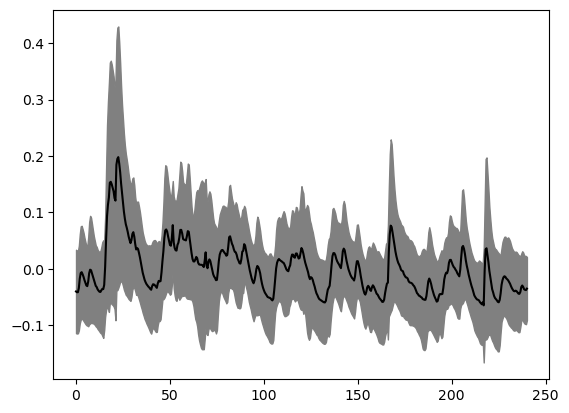

In [103]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.fill_between(brain_times,dff_mean-dff_std,dff_mean+dff_std,color='gray')
ax.plot(brain_times,dff_mean,color='black')
plt.show()